# Homework I for ISDN6380B

Siyan HU, student no. 12217679

## Transformations

In [23]:
import numpy as np
import math
import requests
import cv2
from matplotlib import pyplot as plt

In [24]:
def to_homogeneous_matrix(matrix):
    """
    Convert a 2D array into a homogeneous matrix
    """
    rows = matrix.shape[0]
    if len(matrix.shape) > 1:
        cols = matrix.shape[1]
        homogeneous_matrix = np.ones((rows + 1, cols + 1))
        homogeneous_matrix[:rows, :cols] = matrix
        return homogeneous_matrix
    else:
        homogeneous_matrix = np.ones((rows + 1,))
        homogeneous_matrix[:rows] = matrix
        return homogeneous_matrix
    

def to_cartesian_matrix(matrix):
    if len(matrix.shape) > 1:
        cartesian_matrix = matrix[:-1, :] / matrix[-1, :]
        return cartesian_matrix
    else:
        return matrix[:-1] / matrix[-1]

In [25]:
def multiply_matrices(matrix1, matrix2):
    if matrix1.shape[1] != matrix2.shape[0]:
        raise ValueError('Error: 1st column doesnt equal to 2nd row.\n')
    return np.dot(matrix1, matrix2)

In [26]:
def rotate_2darray_by_angle(array, rad, clockwise=False):
    """
    Should suppose input array is a homogeneous array
    """
    cos_angle = np.cos(rad)
    sin_angle = np.sin(rad)

    rotate_array = np.identity(3)
    rotate_array[0, 0] = cos_angle
    rotate_array[0, 1] = -1 * sin_angle
    rotate_array[1, 0] = sin_angle
    rotate_array[1, 1] = cos_angle

    if clockwise:
        rotate_array[0, 0] = cos_angle
        rotate_array[0, 1] = sin_angle
        rotate_array[1, 0] = -1 * sin_angle
        rotate_array[1, 1] = cos_angle

    return multiply_matrices(rotate_array, array)


def translate_2darray_by_displacement(array, dx, dy):
    """
    Should suppose input array is a homogeneous array
    """
    translate_array = np.identity(3)
    translate_array[0, 2] = dx
    translate_array[1, 2] = dy
    return multiply_matrices(translate_array, array)


def scale_2darray_by_scalar(array, a, b):
    """
    Should suppose input array is a homogeneous array
    """
    scale_array = np.identity(3)
    scale_array[0, 0] = a
    scale_array[1, 1] = b
    return multiply_matrices(scale_array, array)

## Exercise 1

1. Find p1' by rotating p1 by PI/4;
2. Find p2' by scaling p2 by 3;
3. Find p3’ by translating p3 by 2 in the x direction, and 3 in the y direction;
4. Find p4’ by rotating p4 by PI/2, translating by 3 in the x direction and 5 in the y direction, and rotating again by PI/4

In [27]:
p1 = (2, 3)
p2 = (3, 5)
p3 = (5, 4)
p4 = (6, 1)

In [28]:
# 1-1
p1_mat = np.array(p1)
p1_mat_homo = to_homogeneous_matrix(p1_mat)
p1_prime = rotate_2darray_by_angle(p1_mat_homo, np.pi/4)
to_cartesian_matrix(p1_prime)

array([-0.70710678,  3.53553391])

In [29]:
# 1-2
p2_mat = np.array(p2)
p2_mat_homo = to_homogeneous_matrix(p2_mat)
p2_prime = scale_2darray_by_scalar(p2_mat_homo, a=3, b=3)
to_cartesian_matrix(p2_prime)

array([ 9., 15.])

In [30]:
# 1-3
p3_mat = np.array(p3)
p3_mat_homo = to_homogeneous_matrix(p3_mat)
p3_prime = translate_2darray_by_displacement(p3_mat_homo, dx=2, dy=3)
to_cartesian_matrix(p3_prime)

array([7., 7.])

In [31]:
# 1-4
p4_mat = np.array(p4)
p4_mat_homo = to_homogeneous_matrix(p4_mat)
p4_prime = rotate_2darray_by_angle(p4_mat_homo, np.pi/2.0)
p4_prime = translate_2darray_by_displacement(p4_prime, dx=3, dy=5)
p4_prime = rotate_2darray_by_angle(p4_prime, np.pi/4)
to_cartesian_matrix(p4_prime)

array([-6.36396103,  9.19238816])

## Exercise 2

Download an image on the Internet, perform the following operations, and plot the resulting image

- Rotate by PI/2
- Scale by a factor 1.5
- Translate by 1/10 of the image length

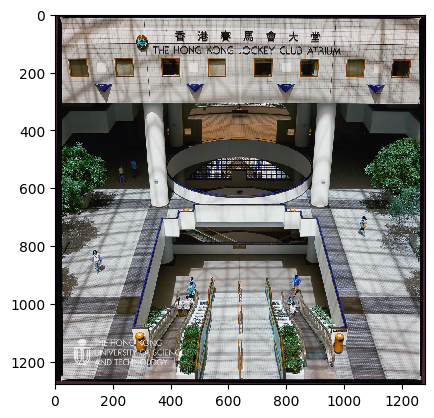

In [52]:
image_url = "https://hkust.edu.hk/system/files/styles/multimedia_gallery_images_view/private/2018-12/Atrium_LR_0.jpg?itok=LOOmnwjo"

response = requests.get(image_url)
if not (response.status_code == 200):
    raise ValueError('Error: cannot download image.\n')
else:
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.COLOR_BGR2RGB)
    plt.imshow(image, interpolation='nearest')

### 2-1: with OpenCV predefined functions

In [63]:
def image_transformation(image_array, radiance, a, b, dx, dy):
    height, width = image_array.shape[:2]
    center = (round(height/2), round(width/2))
    rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=np.rad2deg(radiance), scale=(a+b)/2.0)
    rotated_image= cv2.warpAffine(src=image_array, M=rotate_matrix, dsize=(width, height))
    translation_matrix= np.array([[1, 0, dx], [0, 1, dy] ], dtype=np.float32)
    transformed_image = cv2.warpAffine(src=rotated_image, M=translation_matrix, dsize=(width * 3, height * 3))
    return transformed_image

Parameters from page 6/18

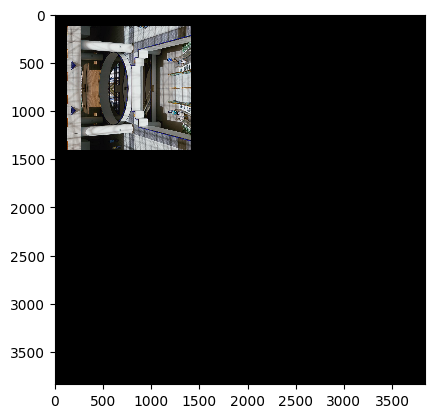

In [64]:
height, width = image.shape[:2]

trans_dy = height/10.0
trans_dx = width/10.0

transformed_image = image_transformation(image, np.pi/2.0, a=1.5, b=1.5, dx=trans_dx, dy=trans_dy)
plt.imshow(transformed_image, interpolation='nearest')
# transformed_image

Parameters from page 7/18

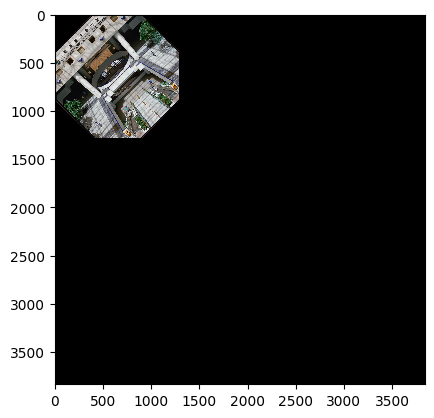

In [65]:
height, width = image.shape[:2]

trans_dy = 2
trans_dx = 10

transformed_image = image_transformation(image, np.deg2rad(45), a=1, b=1, dx=trans_dx, dy=trans_dy)
plt.imshow(transformed_image, interpolation='nearest')

### 2-2: with pure numpy

In [36]:
def position_transformation(pos, radiance, a, b, dx, dy):
    pos_mat = np.array(pos)
    pos_homo = to_homogeneous_matrix(pos_mat)
    target_pos = rotate_2darray_by_angle(pos_homo, radiance)
    target_pos = scale_2darray_by_scalar(target_pos, a, b)
    target_pos = translate_2darray_by_displacement(target_pos, dx, dy)
    target_pos = to_cartesian_matrix(target_pos)
    return target_pos

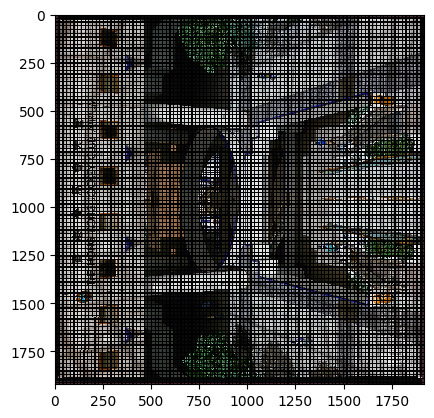

In [37]:
height, width = image.shape[:2]
trans_dy = height/10.0
trans_dx = width/10.0
center = (0, 0) # maybe some other points

pos0 = (0, 0)
ceil0 = position_transformation(pos0, np.pi/2.0, a=1.5, b=1.5, dx=trans_dx, dy=trans_dy)

pos1 = (height, width)
ceil1 = position_transformation(pos1, np.pi/2.0, a=1.5, b=1.5, dx=trans_dx, dy=trans_dy)

new_height = int(max(ceil0[0], ceil1[0]) - min(ceil0[0], ceil1[0])) + 1
new_width = int(max(ceil0[1], ceil1[1]) - min(ceil0[1], ceil1[1])) + 1
image_trans = np.zeros((new_height, new_width, 3), dtype=np.uint8)

for i, row in enumerate(image):
    for j, col in enumerate(row):
        pixel_data= image[i,j]
        src_pos = np.array([i - center[0], j - center[1]])
        target_pos = position_transformation(src_pos, np.pi/2.0, a=1.5, b=1.5, dx=trans_dx, dy=trans_dy)
        target_pos[0] = int(target_pos[0] - min(ceil0[0], ceil1[0])) # add one more translation just to show image from (0, 0)
        target_pos[1] = int(target_pos[1] - min(ceil0[1], ceil1[1])) # add one more translation just to show image from (0, 0)
        image_trans[int(target_pos[0]), int(target_pos[1])] = pixel_data

plt.imshow(image_trans, interpolation='nearest')

## Exercise 3

Implement the Marker detecting function presented in the class
1. Calibrate camera
2. Find Marker contour
3. Find Homography Matrix
4. Display image over the marker

### Capture the Image

Load images

In [38]:
import os
import sys

# cd .../ISDN6830B_HOMEWORK/hw1

cwd = os.getcwd()
sys.path.append(cwd)

import file_io as fio

Trim effective area:

In [39]:
cb_dir = fio.createPath(fio.sep, [cwd, 'chessboards'])
cb_image_paths = fio.traverse_dir(cb_dir, full_path=True, towards_sub=False)
cb_image_paths = fio.filter_ext(cb_image_paths, filter_out_target=False, ext_set=fio.img_ext_set)

save_dir = fio.createPath(fio.sep, [cwd, 'cropped_chessborads'])
if not fio.file_exist(save_dir):
    fio.ensure_dir(save_dir)
    original_image_paths = cb_image_paths
    cb_image_paths = []

    for fname in original_image_paths:
        img = cv2.imread(fname)
        (imgdir, title, imgext) = fio.get_filename_components(fname)
        height, width = img.shape[:2]
        cropped_image = img[int(0.15 * height):int(0.7 * height), int(0.15 * width):int(0.8 * width)]
        save_path = fio.createPath(fio.sep, [save_dir], title + '.jpg')
        cv2.imwrite(save_path, cropped_image)
        cb_image_paths.append(save_path)

In [40]:
marker_dir = fio.createPath(fio.sep, [cwd, 'markers'])
marker_image_paths = fio.traverse_dir(marker_dir, full_path=True, towards_sub=False)
marker_image_paths = fio.filter_ext(marker_image_paths, filter_out_target=False, ext_set=fio.img_ext_set)

save_dir = fio.createPath(fio.sep, [cwd, 'cropped_markers'])
if not fio.file_exist(save_dir):
    fio.ensure_dir(save_dir)
    original_image_paths = marker_image_paths
    marker_image_paths = []

    for fname in original_image_paths:
        img = cv2.imread(fname)
        (imgdir, title, imgext) = fio.get_filename_components(fname)
        height, width = img.shape[:2]
        cropped_image = img[int(0.15 * height):int(0.7 * height), int(0.15 * width):int(0.8 * width)]
        save_path = fio.createPath(fio.sep, [save_dir], title + '.jpg')
        cv2.imwrite(save_path, cropped_image)
        marker_image_paths.append(save_path)

### Calibrating Camera

In [41]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
CHECKERBOARD = (9, 6)
objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

# Arrays to store object points and image points from all images
objpoints = []  # 3d points in real world space
imgpoints = []  # 2d points in image plane
gray_images = []
save_dir = fio.createPath(fio.sep, [cwd, 'calib_camera'])
if fio.file_exist(save_dir):
    fio.delete_folder(save_dir)
fio.ensure_dir(save_dir)

for fname in cb_image_paths:
    print("Loading chessboard from image:", fname)
    (imgdir, title, imgext) = fio.get_filename_components(fname)

    image = cv2.imread(fname)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    gray_images.append(gray)
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)

    if ret == True:
       objpoints.append(objp)
       corners2 = cv2.cornerSubPix(gray, corners, (11, 11),(-1, -1), criteria)
       imgpoints.append(corners2)
       image = cv2.drawChessboardCorners(image, CHECKERBOARD, corners2, ret)

       save_path = fio.createPath(fio.sep, [save_dir], title + '.jpg')
       cv2.imwrite(save_path, image)


Loading chessboard from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/chessboards/IMG_0467.jpg
Loading chessboard from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/chessboards/IMG_0466.jpg
Loading chessboard from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/chessboards/IMG_0470.jpg
Loading chessboard from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/chessboards/IMG_0464.jpg
Loading chessboard from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/chessboards/IMG_0465.jpg
Loading chessboard from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/chessboards/IMG_0463.jpg
Loading chessboard from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/chessboards/IMG_0468.jpg
Loading chessboard from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/chessboards/IMG_0469.jpg


In [42]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
if ret:
    print("Camera matrix:", mtx)
    print("Distortion coefficients:", dist)
else:
    print("Calibration failed")

Camera matrix: [[4.15100115e+03 0.00000000e+00 1.98511066e+03]
 [0.00000000e+00 4.14577370e+03 2.86435360e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients: [[-1.66753385e-01  8.15948466e+00 -1.73879862e-03 -1.71634501e-02
  -5.65314279e+01]]


### Marker Detection

In [43]:
def sort_contour(contours, image_shape):
    height, width = image_shape[:2]
    image_area = height * width
    max_area = 0.0
    max_cnt = None

    for cnt in contours:
        if not(cnt.shape[0] == 4):
            continue
        area = cv2.contourArea(cnt)
        if area >= 0.9 * image_area:
            continue
        if area > max_area:
            max_area = area
            max_cnt = cnt
    return [max_cnt]

In [44]:
save_dir = fio.createPath(fio.sep, [cwd, 'detected_markers'])
if fio.file_exist(save_dir):
    fio.delete_folder(save_dir)
fio.ensure_dir(save_dir)

for fname in marker_image_paths:
    print("Loading marker from image:", fname)
    (imgdir, title, imgext) = fio.get_filename_components(fname)

    image = cv2.imread(fname)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    ret, thresh = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)

    if ret:
        print("detect content within threshold", ret)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        detected_markers = []
        for cnt in contours:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
            i = approx.shape[0]
            if not (i == 4):
                continue
            polygon = []
            for idi in range(i):
                polygon.append(approx[idi, 0, :])
            
            polygon = np.array(polygon)
            detected_markers.append(polygon)
            
        detected_markers = np.array(detected_markers)
        detected_markers = sort_contour(detected_markers, image.shape)
        dst_points = np.array([[0, 0], [900, 0], [900, 900], [0, 900]], dtype='float32')
        for marker in detected_markers:
            if not(marker.shape[0] == 4):
                print(marker)
            src_points = marker.reshape(4, 2).astype('float32')
            H, status = cv2.findHomography(src_points, dst_points)
            warped = cv2.warpPerspective(image, H, (900, 900))
            cv2.polylines(image, [marker], True, (125,250,125), 10, cv2.LINE_AA)

        save_path = fio.createPath(fio.sep, [save_dir], title + '.jpg')
        cv2.imwrite(save_path, image)
        print("write to...", save_path)

        # cv2.imshow('Detected Markers:' + title, image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

Loading marker from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/markers/IMG_0458.jpg
detect content within threshold 125.0
write to... /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/detected_markers/IMG_0458.jpg
Loading marker from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/markers/IMG_0459.jpg
detect content within threshold 125.0
write to... /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/detected_markers/IMG_0459.jpg
Loading marker from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/markers/IMG_0461.jpg
detect content within threshold 125.0
write to... /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/detected_markers/IMG_0461.jpg
Loading marker from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/markers/IMG_0460.jpg
detect content within threshold 125.0
write to... /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/detected_markers/IMG_0460.jpg
Loading marker from image: /Users/siyanhu/GitHub/ISDN6380B_Homework/hw1/markers/IMG_0462.jpg
detect content within threshold 125